1. IMPORT DEPENDENCIES

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. KEY POINTS USING MP HOLISTIC

In [3]:
mp_hol = mp.solutions.holistic
mp_draw = mp.solutions.drawing_utils

In [5]:
mp_hol.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_draw.draw_landmarks(image, results.face_landmarks, mp_hol.FACEMESH_TESSELATION)
    mp_draw.draw_landmarks(image, results.pose_landmarks, mp_hol.POSE_CONNECTIONS)
    mp_draw.draw_landmarks(image, results.left_hand_landmarks, mp_hol.HAND_CONNECTIONS)
    mp_draw.draw_landmarks(image, results.right_hand_landmarks, mp_hol.HAND_CONNECTIONS)

In [8]:
def draw_style_landmarks(image, results):
    mp_draw.draw_landmarks(image, results.face_landmarks, mp_hol.FACEMESH_TESSELATION,
                           mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                           )
    mp_draw.draw_landmarks(image, results.pose_landmarks, mp_hol.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                           mp_draw.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_draw.draw_landmarks(image, results.left_hand_landmarks, mp_hol.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                           mp_draw.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_draw.draw_landmarks(image, results.right_hand_landmarks, mp_hol.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                           mp_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [25]:
cap = cv2.VideoCapture(0)

with mp_hol.Holistic(min_detection_confidence = 0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)

        # print(results)

        draw_style_landmarks(image, results)

        cv2.imshow("OpenCV Feed", image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [26]:
results.left_hand_landmarks

In [27]:
results

mediapipe.python.solution_base.SolutionOutputs

In [28]:
draw_landmarks(frame, results)

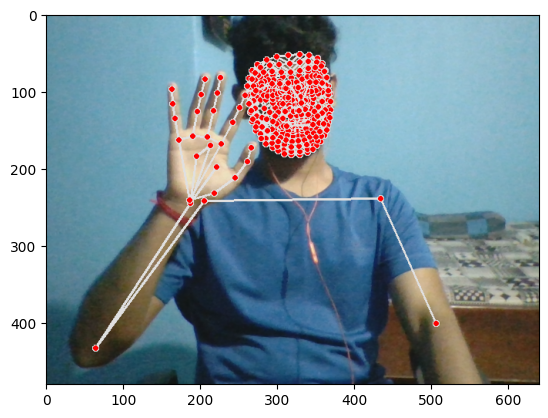

In [29]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. EXTRACT KEYPOINTS VALUES

In [14]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [16]:
face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [17]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [18]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_text = extract_keypoints(results)

In [21]:
result_text

array([ 0.51679879,  0.37634674, -1.51665521, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_text)

4. SETUP FOLDERS FOR COLLECTION

In [23]:
DATA_PATH = os.path.join("MP_DATA") #path for exported data
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_seq = 30
seq_len = 30

In [24]:
for action in actions:
    for seq in range(no_seq):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(seq)))
        except:
            pass

5. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [30]:
cap = cv2.VideoCapture(0)

with mp_hol.Holistic(min_detection_confidence = 0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for seq in range(no_seq):
            for fnum in range(seq_len):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                # print(results)

                draw_style_landmarks(image, results)

                if fnum == 0:
                    cv2.putText(image, 'STARTING CONNECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action,seq), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action,seq), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(seq), str(fnum))
                np.save(npy_path, keypoints)

                cv2.imshow("OpenCV Feed", image)
        

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_seq):
        window = []
        for fnum in  range(seq_len):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(fnum)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [39]:
X.shape

(90, 30, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [42]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [46]:
y_test.shape

(5, 3)

7. BUILD AND TRAIN LSTM NEURAL NETWORKS

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [48]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [53]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [54]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 129ms/step - loss: 1.1240 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1196 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.5499 - categorical_accuracy: 0.3176
Epoch 4/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0716 - categorical_accuracy: 0.3765
Epoch 5/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.3777 - categorical_accuracy: 0.1412
Epoch 6/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0309 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9413 - categorical_accuracy: 0.4471
Epoch 8/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.9351 - categorical_accuracy: 0.4941
Epoch 9/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.8096 - categorical_accuracy:

KeyboardInterrupt: 

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

8. MAKE PREDICTIONS

In [57]:
res = model.predict(X_test)

1/1 [==============================] - 1s 711ms/step


In [62]:
actions[np.argmax(res[1])]

'hello'

In [63]:
actions[np.argmax(y_test[1])]

'hello'

9. SAVE WEIGHTS

In [64]:
model.save('action.h5')

10. EVALUATION

In [65]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [74]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [75]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [77]:
accuracy_score(ytrue, yhat)

1.0

11. TEST IN REAL TIME

In [78]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

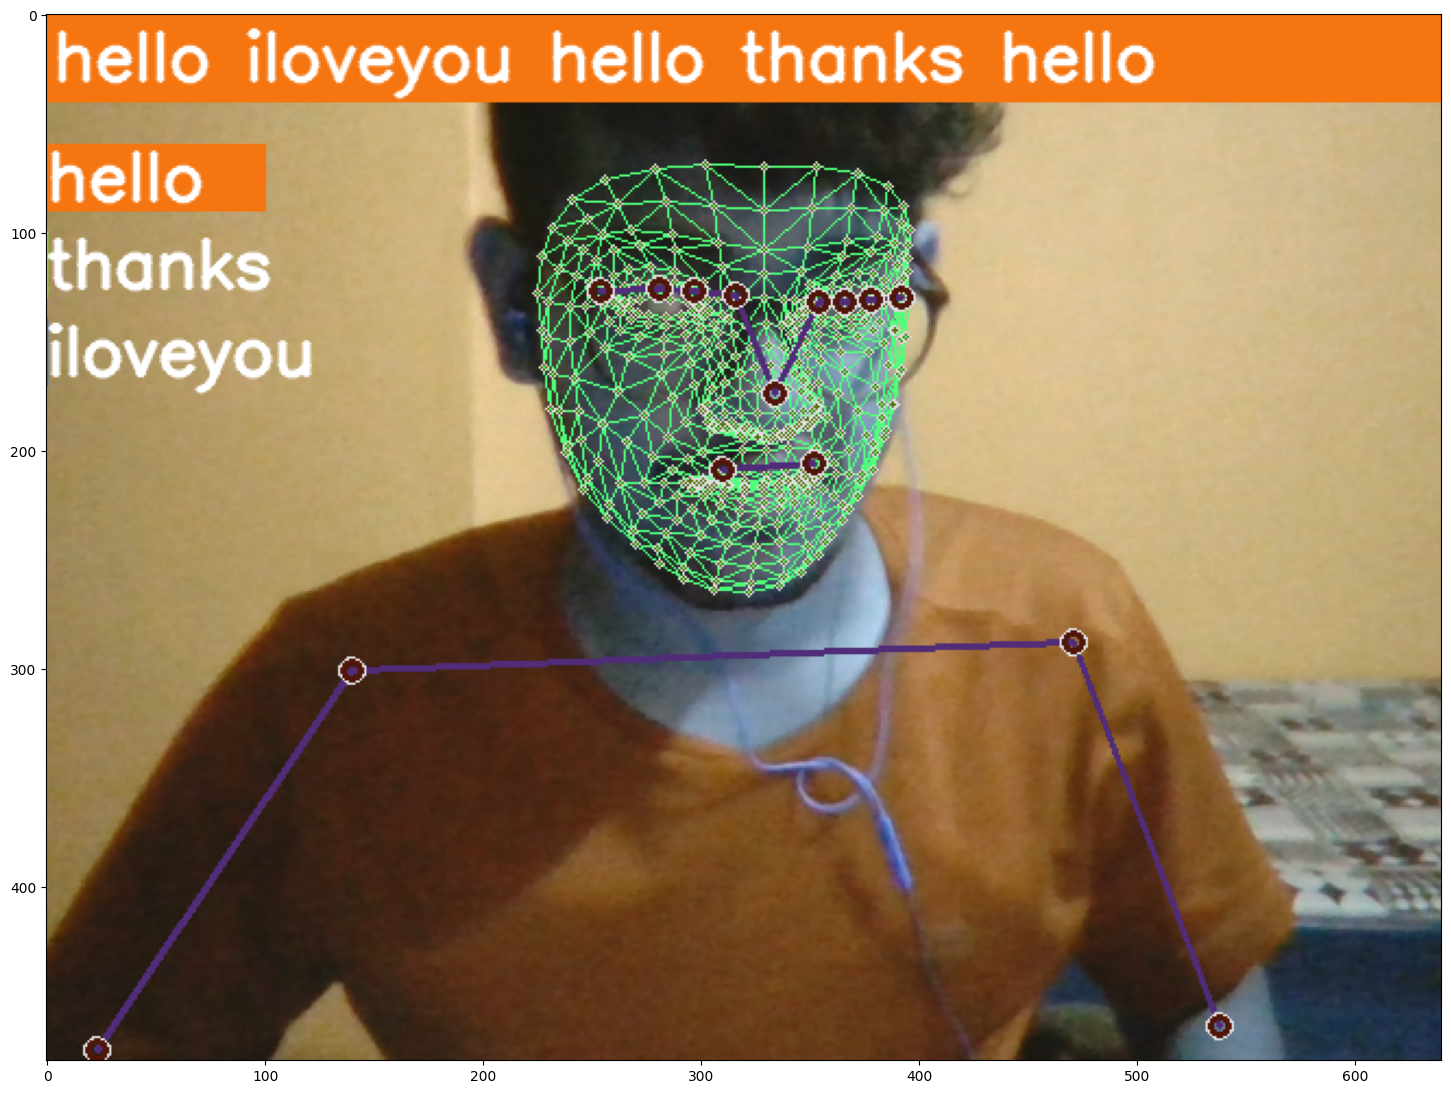

In [81]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [80]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_hol.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_style_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti